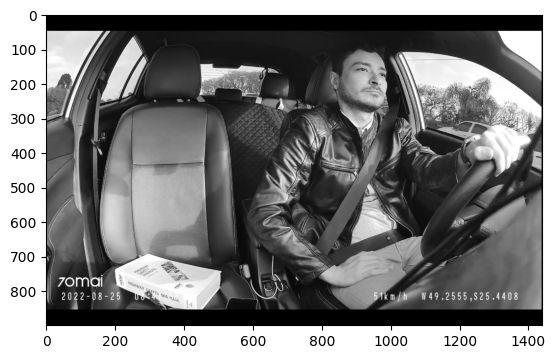

In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('imagemIC.png', cv2.IMREAD_GRAYSCALE)

M = np.array([[1,1,1], [1, 1, 1], [1,1,1]]) *(1/9)
output=cv2.filter2D(img,-1,M)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_GRAY2BGR))
# plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

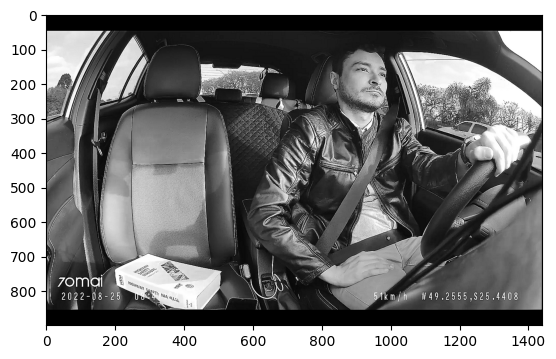

In [19]:
# #Sharpening
    
M = np.array([[0,0,0], [0,2,0], [0,0,0]]) - 1/9*np.array([[1,1,1], [1,1,1], [1,1,1]])

kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])

output=cv2.filter2D(img,-1,kernel)

plt.imshow(cv2.cvtColor(output, cv2.COLOR_GRAY2BGR))

IntSlider(value=127, max=255)

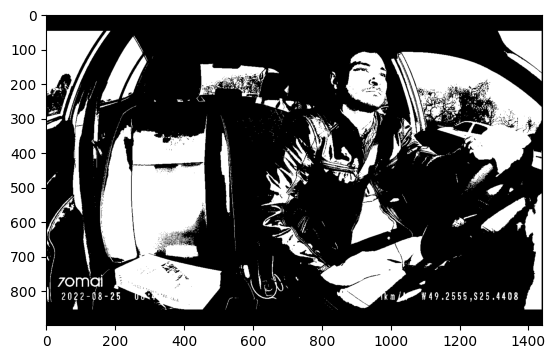

In [20]:
from IPython.display import clear_output
import ipywidgets as widgets
# código para exibir a imagem

img = cv2.imread('imagemIC.png')

plt.show(block=False)
clear_output(wait=True)


def display_image(threshold=127):
    global img  # make sure to use the global image variable
    plt.clf()
    plt.close('all')
    clear_output(wait=False)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)
    plt.imshow(binary, cmap="gray")

display_image()

slider = widgets.IntSlider(min=0, max=255, step=1, value=127)

def on_value_change(change):
    display_image(change.new)
    display(slider)

slider.observe(on_value_change, names='value', type='change')

display(slider)


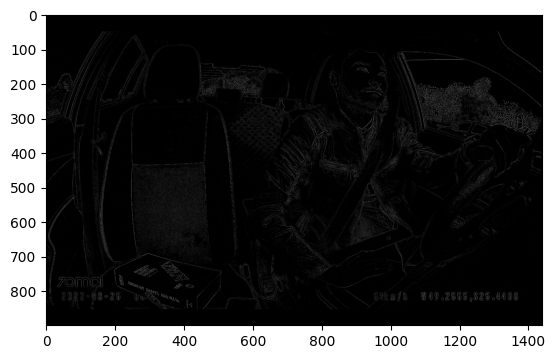

In [21]:
#Subtract do sharpness
img = cv2.imread('imagemIC.png', cv2.IMREAD_GRAYSCALE)
sub=cv2.subtract(img, output)
plt.imshow(cv2.cvtColor(sub,cv2.COLOR_GRAY2BGR))

IntSlider(value=11, max=31, min=1, step=2)

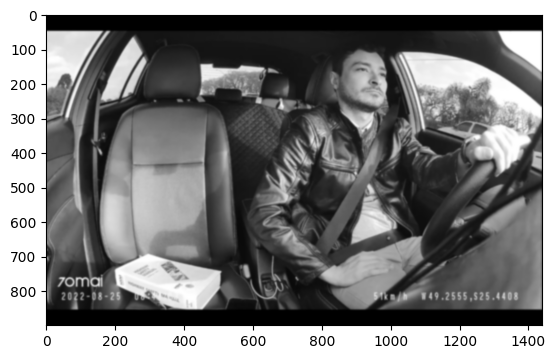

In [22]:
blur = cv2.GaussianBlur(img,(11,11),0)
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_GRAY2BGR))

plt.show(block=False)
clear_output(wait=True)

def display_image(blur=11):
    global img
    plt.clf()
    plt.close('all')
    clear_output(wait=False)
    blur = cv2.GaussianBlur(img,(blur,blur),0)
    plt.imshow(cv2.cvtColor(blur, cv2.COLOR_GRAY2BGR))

display_image()

slider = widgets.IntSlider(min=1, max=31, step=2, value=11)

def on_value_change(change):
    display_image(change.new)
    display(slider)

slider.observe(on_value_change, names='value', type='change')

display(slider)

IntSlider(value=0, max=18)

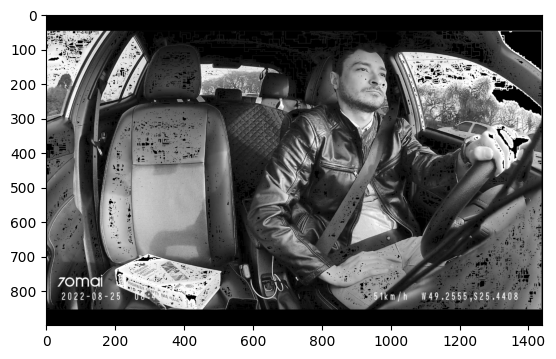

In [23]:
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel = np.sqrt(np.square(sobelx) + np.square(sobely))

plt.show(block=False)
clear_output(wait=True)

def display_image(mask_number=0):
    global img
    plt.clf()
    plt.close('all')
    clear_output(wait=False)
    mask = np.uint8(sobel > np.mean(sobel) * mask_number)
    masked_img = cv2.bitwise_and(img, img, mask=mask)
    plt.imshow(masked_img, cmap='gray')

display_image()

slider = widgets.IntSlider(min=0, max=18, step=1, value=0)

def on_value_change(change):
    display_image(change.new)
    display(slider)

slider.observe(on_value_change, names='value', type='change')

# Cria uma máscara para manter apenas os pixels que representam as bordas

# Aplica a máscara na imagem

display(slider)


IntSlider(value=127, max=255)

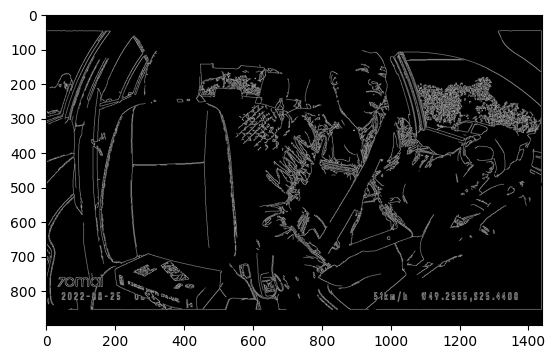

In [24]:
# Canny para detecção de bordas

plt.show(block=False)
clear_output(wait=True)

def display_image(canny_threshold=127):
    global img
    plt.clf()
    plt.close('all')
    clear_output(wait=False)
    edges = cv2.Canny(img, canny_threshold, canny_threshold * 3)
    plt.imshow(edges, cmap='gray')

display_image()

slider = widgets.IntSlider(min=0, max=255, step=1, value=127)

def on_value_change(change):
    display_image(change.new)
    display(slider)

slider.observe(on_value_change, names='value', type='change')

display(slider)



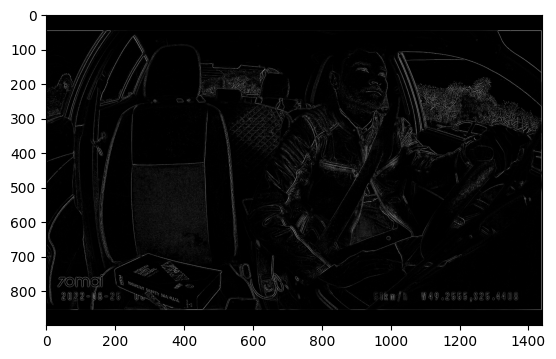

In [25]:
#Filtro laplaciano
laplacian = cv2.Laplacian(img, cv2.CV_8U)

plt.imshow(laplacian,cmap="gray")

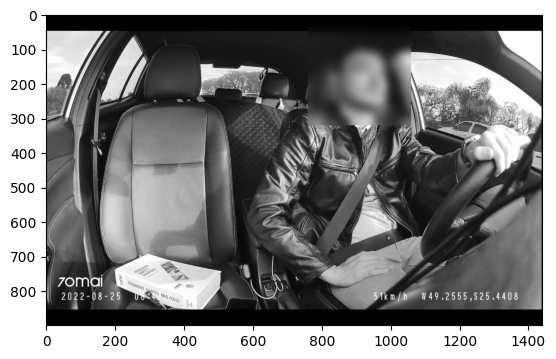

In [26]:
x = 760
y = 20
w = 300
h = 300
roi = img[y:y+h, x:x+w]
blurred_img=img[:]
ksize = (77, 77)
sigma = 0
blurred_roi = cv2.GaussianBlur(roi, ksize, sigma)

blurred_img[y:y+h, x:x+w] = blurred_roi

plt.imshow(blurred_img, cmap="gray")


IntSlider(value=0)

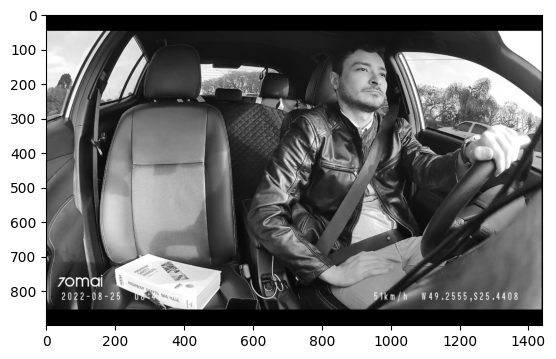

In [27]:
plt.show(block=False)
clear_output(wait=True)

alpha_slider_max = 100
title_window = 'Linear Blend'

src1 = cv2.imread("imagemIC.png")
src2 = cv2.imread("grayscale.png")

def display_image(linear_blend=0):
    global img
    plt.clf()
    plt.close('all')
    clear_output(wait=False)
    alpha = linear_blend / alpha_slider_max
    beta = ( 1.0 - alpha )
    dst = cv2.addWeighted(src1, alpha, src2, beta, 0.0)
    plt.imshow(dst, cmap='gray')

display_image()

slider = widgets.IntSlider(min=0, max=100, step=1, value=0)

def on_value_change(change):
    display_image(change.new)
    display(slider)

slider.observe(on_value_change, names='value', type='change')

display(slider)

